In [2]:
import pandas as pd

In [9]:
acc_LH = pd.read_pickle('acc_LH')

In [10]:
acc_LH

,timestamp,AP,UR,DP
0,1.614261e+09,0.845729,0.204596,-0.465346
1,1.614261e+09,0.933007,0.057224,-0.458669
2,1.614261e+09,0.851286,0.049057,-0.482719
3,1.614261e+09,0.824938,0.148752,-0.482993
4,1.614261e+09,0.902090,0.092045,-0.468312
...,...,...,...,...
24693,1.614261e+09,-0.654801,0.508363,-0.607122
24694,1.614261e+09,-0.659539,0.489123,-0.608483
24695,1.614261e+09,-0.657942,0.487501,-0.603245
24696,1.614261e+09,-0.661915,0.491499,-0.598858


In [6]:
import matplotlib.pyplot as plt

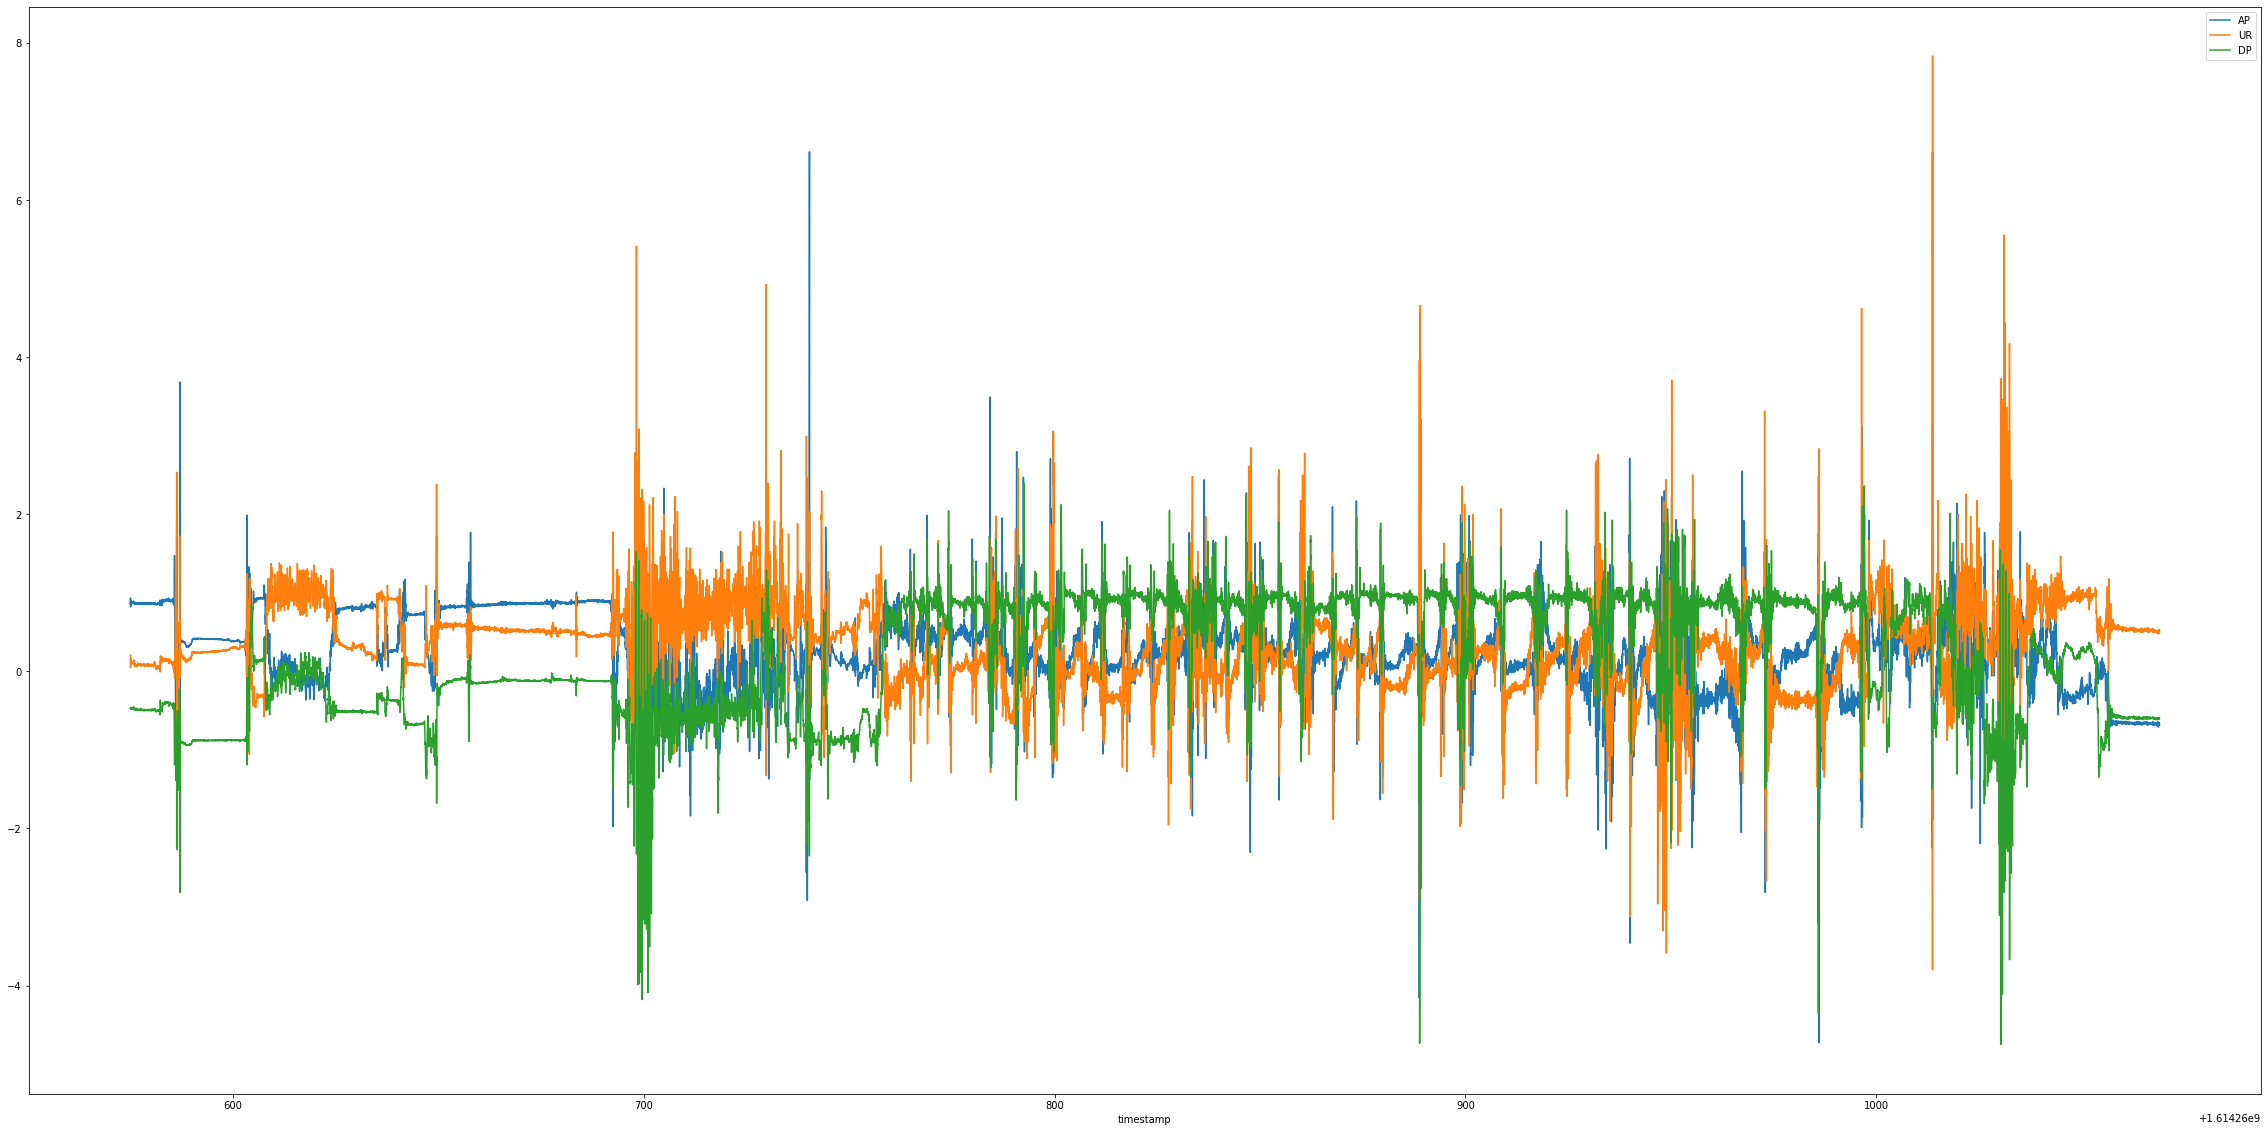

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
for name in acc_LH:
    if name!='timestamp':
        subplot_data = pd.DataFrame()
        subplot_data[name] = acc_LH[name]
        subplot_data['timestamp'] =  acc_LH['timestamp']
        ax = subplot_data.plot(ax=ax, x = 'timestamp',y=name)
#plt.show()
fig.savefig('test2png.png', dpi=600)

In [31]:
climbingData = pd.read_pickle('climbing')

In [33]:
climbingData[climbingData.is_climb]

,timestamp,is_climb
9151,1.614261e+09,True
9152,1.614261e+09,True
9153,1.614261e+09,True
9154,1.614261e+09,True
9155,1.614261e+09,True
...,...,...
21187,1.614261e+09,True
21188,1.614261e+09,True
21189,1.614261e+09,True
21190,1.614261e+09,True


In [34]:
climbingData = pd.read_pickle('climbs_0_height_profile')

In [35]:
climbingData

,0
0,0.143611
1,0.145694
2,0.148058
3,0.150731
4,0.153745
...,...
2463,11.310796
2464,11.311476
2465,11.311965
2466,11.312283


In [162]:
delta_time = (acc_LH['timestamp'] - acc_LH['timestamp'].shift(1))[1:]
delta_speed = ((acc_LH['UR'] + acc_LH['UR'].shift(1))/2)[1:]

In [149]:
while (delta_time * delta_speed).sum()>0.2:
    delta_speed -= (delta_time * delta_speed).sum()/1000

<AxesSubplot:>

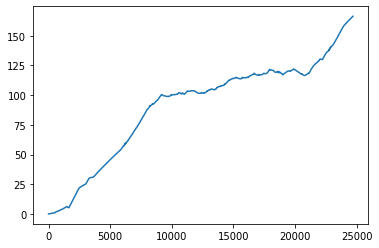

In [163]:
(delta_time * delta_speed).cumsum().plot()

<AxesSubplot:>

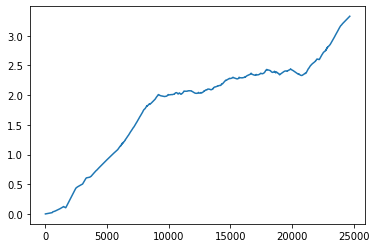

In [168]:
((delta_time * delta_speed)*delta_time).cumsum().plot()

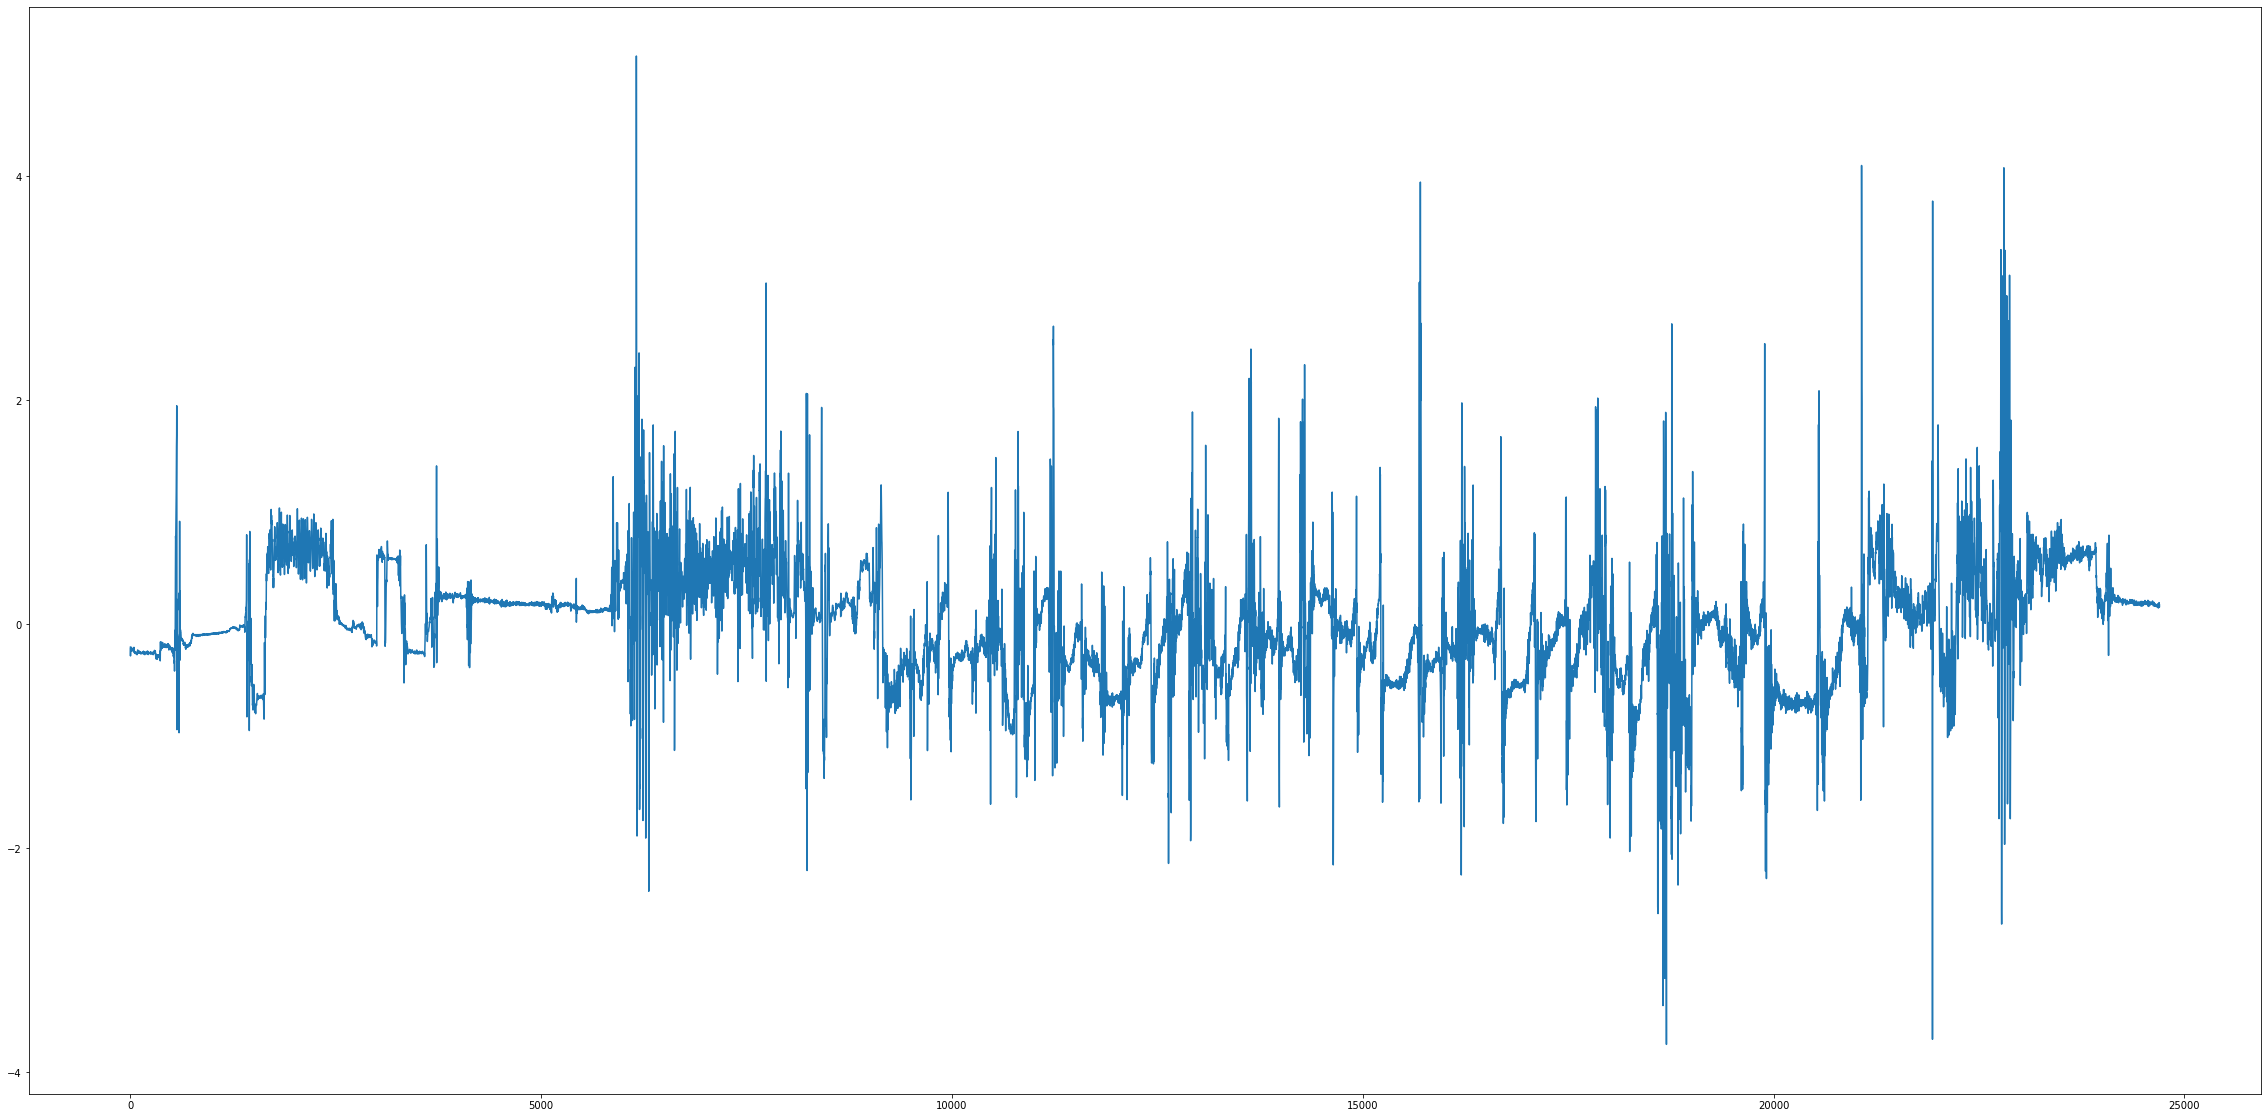

In [155]:
fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
delta_speed.plot(ax=ax)
fig.savefig('acc.png', dpi=600)

In [108]:
delta_speed

1        0.052977
2       -0.024792
3        0.020972
4        0.042466
5        0.036703
           ...   
24693    0.435744
24694    0.420810
24695    0.410379
24696    0.411567
24697    0.429567
Name: UR, Length: 24697, dtype: float64